In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GOLD.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [9]:
X = df.iloc[:411, 1:5].values
len(X)

411

In [10]:
Y = df.iloc[:411, 7]
len(Y)

411

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=60)

In [13]:
regressor = RandomForestRegressor(n_estimators=100)

In [14]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
price_prediction = regressor.predict(X_test)

In [16]:
price_prediction

array([268.19, 205.44, 678.27, 343.72, 388.16, 321.88, 389.79, 305.1 ,
       365.59, 242.96, 350.29, 274.52, 207.46, 399.93, 428.23, 573.91,
       110.57, 498.07, 306.04, 245.08, 233.27, 185.33, 343.69, 217.92,
       394.06, 237.97, 230.23, 174.72, 303.74, 491.62, 270.88, 422.34,
       322.38, 344.78, 323.47, 772.17, 277.47, 468.69, 212.75, 210.93,
       201.18, 451.11])

In [17]:
error_score = metrics.r2_score(Y_test, price_prediction)

In [18]:
error_score

0.3838829194358503

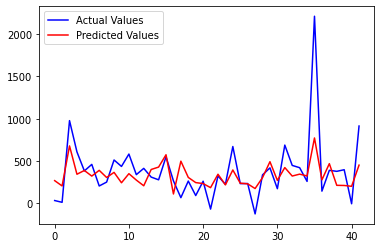

In [19]:
plt.plot(list(Y_test), color = 'blue', label='Actual Values')
plt.plot(price_prediction, color = 'red', label='Predicted Values')
plt.legend()

# Predicted values for rows from index 411

In [20]:
X_pred = df.iloc[411:, 1:5].values
Y_new = regressor.predict(X_pred)
Y_new

array([425.64, 391.78, 584.17, 450.73, 289.6 , 675.69, 510.71, 339.11,
       257.55, 376.26, 413.48, 387.55, 426.06, 502.21, 444.55, 417.61,
        57.93, 442.97, 410.35, 405.28, 239.97,  55.81,  55.81,  55.81,
        55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,
        55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,
        55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,
        55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,  55.81,
        55.81,  55.81,  55.81,  55.81,  55.81, 109.43,  55.81,  55.81,
        57.93,  55.81,  56.95, 142.72, 323.92, 240.35, 286.36,  59.41,
        55.81,  55.81,  55.81,  55.81, 318.43, 407.62, 391.77, 521.74,
       500.96, 448.79, 447.98,  39.78,  55.81,  55.81, 187.12, 173.69,
       440.64, 459.3 , 456.26, 509.88, 388.84, 418.81, 442.31, 280.06,
       282.65, 304.63, 411.89, 425.37, 330.46])